Accuracy score: 0.826530612244898


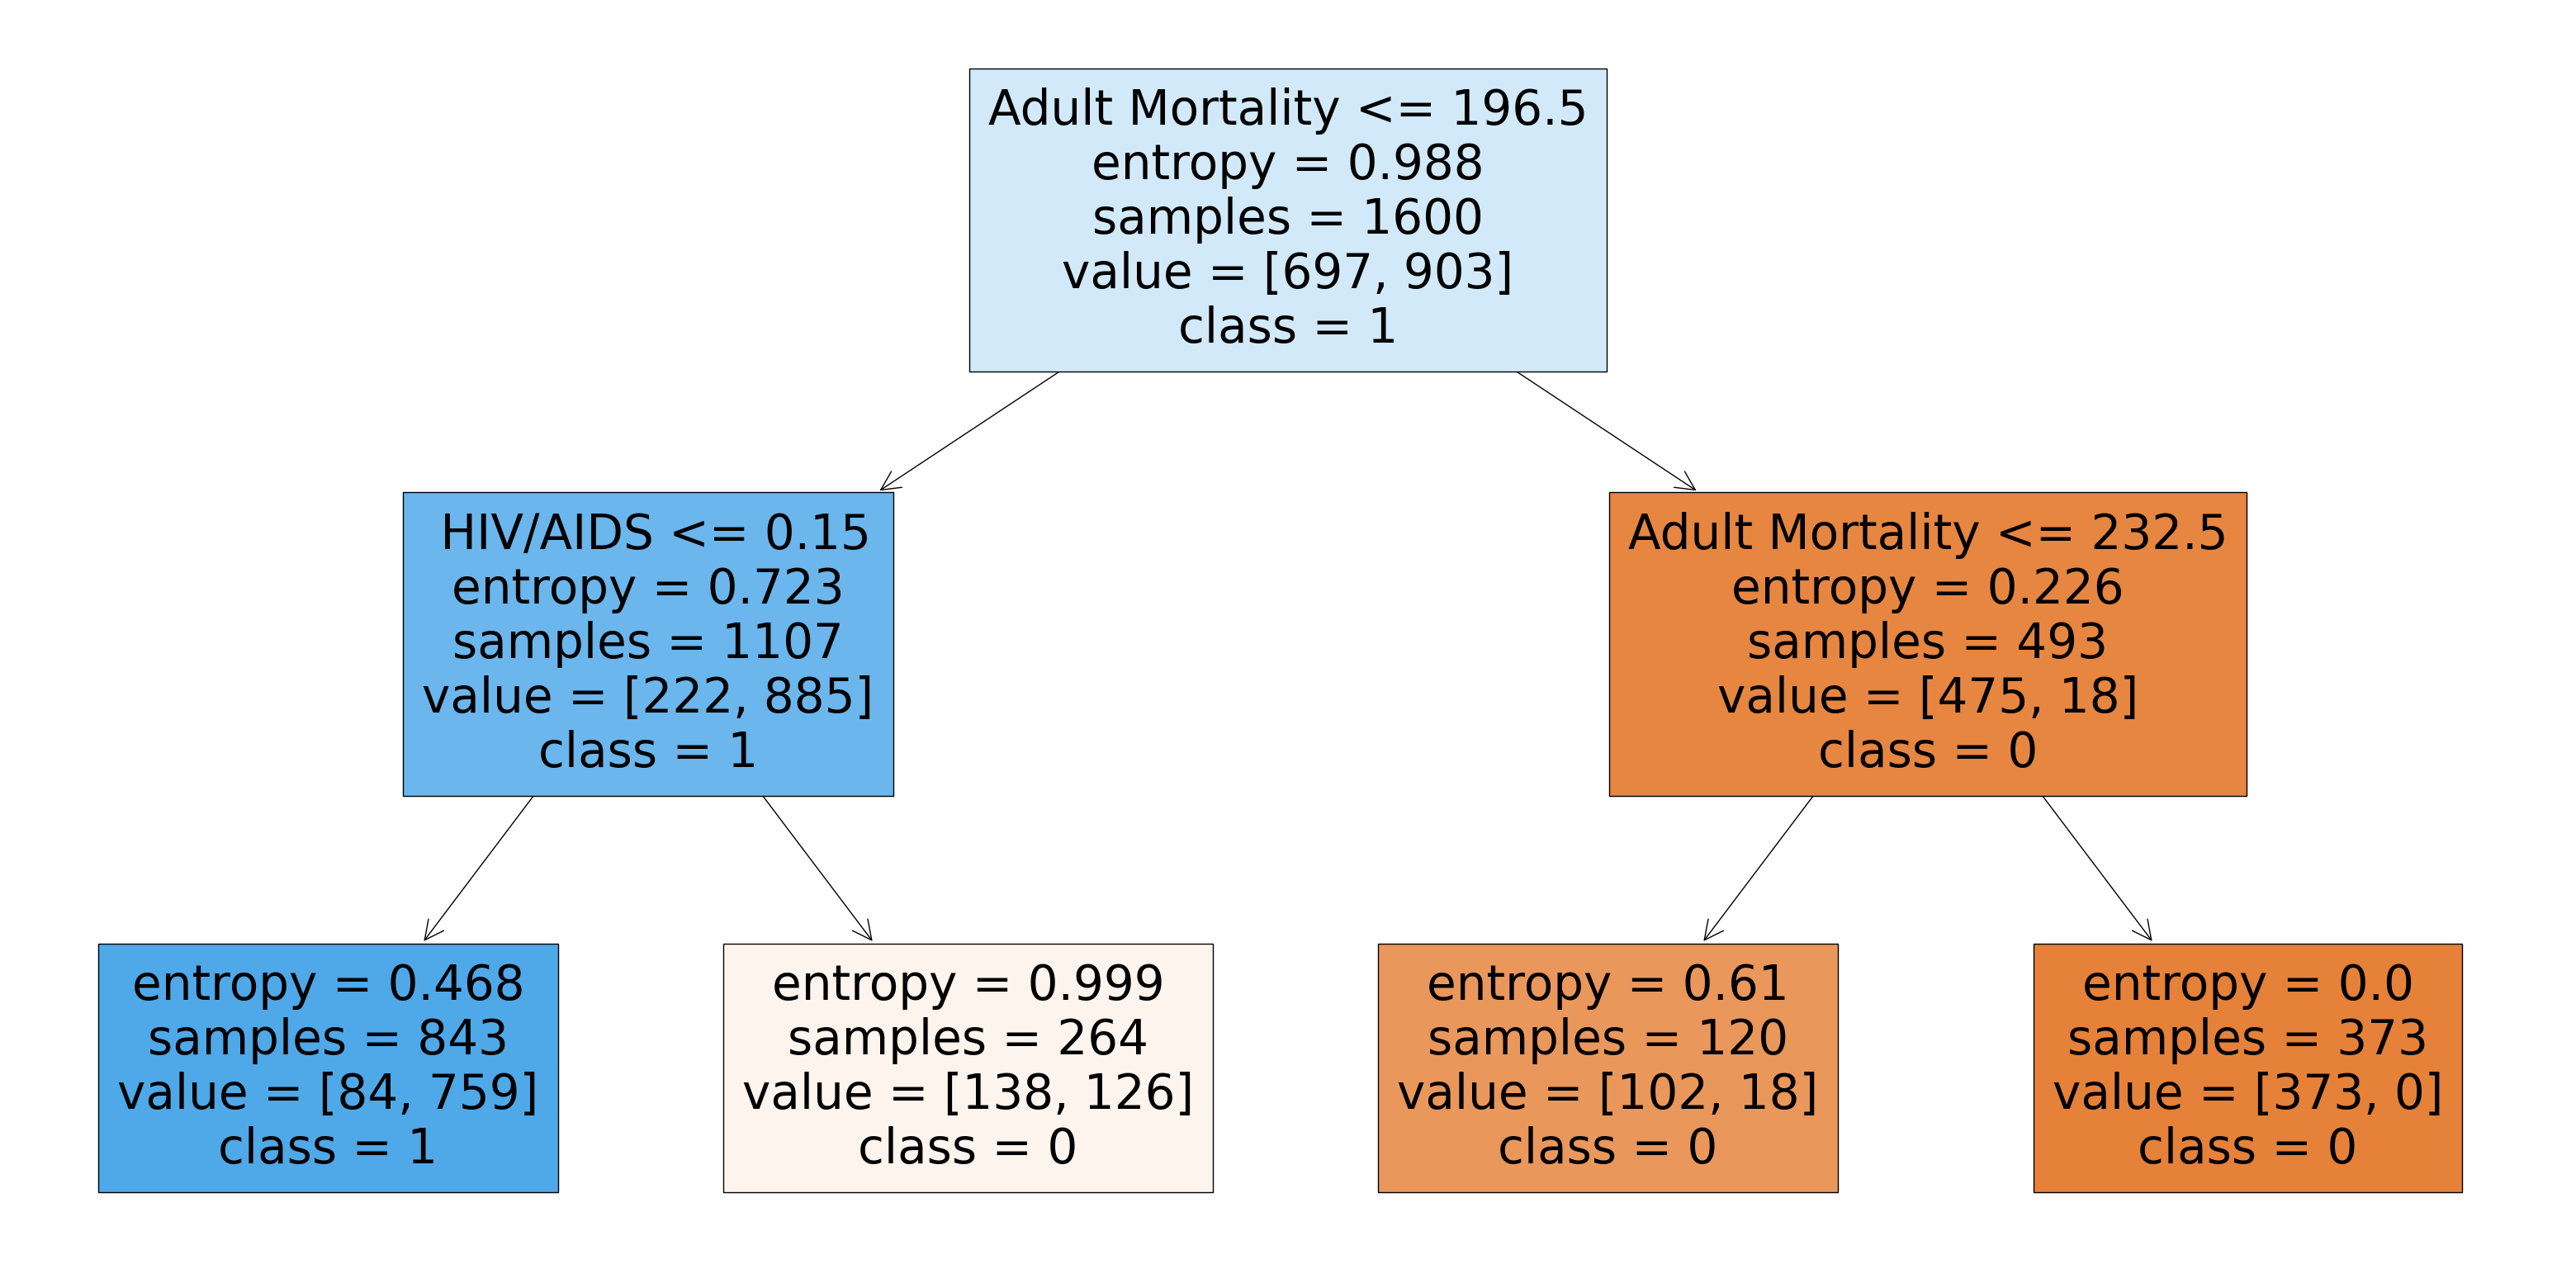

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#empty lists
fnList = []
targetVariable = []

#set up data
data = pd.read_csv('Life Expectancy Data.csv')

# features
X = data[['Adult Mortality',' BMI ',' HIV/AIDS','Income composition of resources','Schooling']]
# a list of the feature names
for col in X.columns:
    fnList.append(col)
feature_names = fnList

# target variable
y = data[['Life expectancy ']]
# all values in the life expectancy column is put into a list
for i in range (len(y)):
    targetVariable.append(y.at[i,'Life expectancy '])
y = targetVariable

# splits life expectancy data into categories (0 to 1)
y = pd.cut(y,bins=[0,70,90],labels=[0,1])

# training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#the training model
model = DecisionTreeClassifier (criterion = 'entropy', min_impurity_decrease = 0.01, min_samples_split = 10, max_depth = 2)
model.fit(X_train, y_train)#training model

y_predicted = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predicted)

print ("Accuracy score:",accuracy)

#visual
fig = plt.figure(figsize=(40,20))
fig = tree.plot_tree(model, feature_names=feature_names,
class_names=['0','1'], filled=True)
